# Import library yang dibutuhkan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#Import dataset

In [8]:
df = pd.read_csv('news.csv', encoding = 'latin-1')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL


#Pengecekan struktur data

In [9]:
df.shape

(6335, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [11]:
df['nomor'] = df['Unnamed: 0']
df['nomor']

,nomor
0,8476
1,10294
2,3608
3,10142
4,875
...,...
6330,4490
6331,8062
6332,8622
6333,4021


In [12]:
data_nomor = df['nomor']


In [13]:
data_nomor_unique = data_nomor.unique()

In [14]:
data_nomor_unique_position = data_nomor.value_counts()

In [15]:
data_label = df['label']
data_label_unique = data_label.unique()

In [16]:
nomors = [f'{nomor}' for nomor in data_nomor_unique]

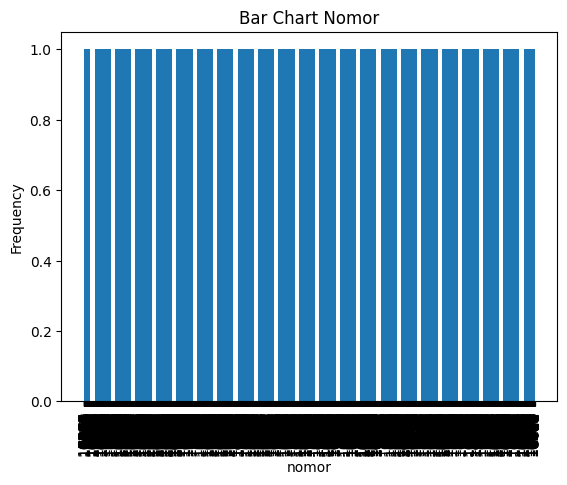

In [17]:
plt.bar(nomors, data_nomor_unique_position)
plt.xlabel('nomor')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Bar Chart Nomor')
plt.show()

In [18]:
data_label = df['label']
data_label_unique = data_label.unique()


In [19]:
data_label_unique_position = data_label.value_counts()

In [20]:
labels = [f'{label}' for label in data_label_unique]

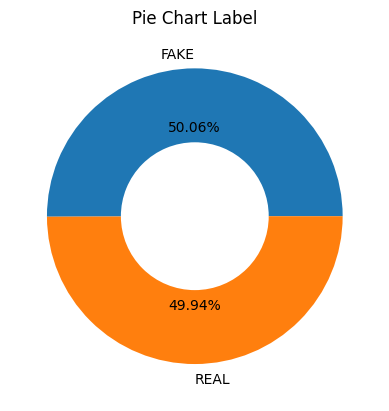

In [21]:
plt.pie(data_label_unique_position, labels=labels, autopct="%1.2f%%", wedgeprops={'width' : 0.5})
plt.title('Pie Chart Label')
plt.show()

In [22]:
#dari keterangan didapat :
# dataset terdiri dari 4 kolom dan 6335 baris
# tipe data title. text dan label semuanya object
# tidak ada data yang kosong (6335 non-null)
#perbandingan target variable (fake & real) seimbang

#Mengambil kolom yang dibutuhkan

In [23]:
df.head(5)

,Unnamed: 0,title,text,label,nomor
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,8476
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,10294
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,3608
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,10142
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,875


In [24]:
#menggabungkan data dari title dan text
df['text2'] = df['title'] + ' ' + df['text']
df['text2'].head(5)

,text2
0,You Can Smell Hillaryâs Fear Daniel Greenfie...
1,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matte...


In [25]:
#df yang digunakan hanya dari kolom label dan text2
df = df[['label', 'text2']]
df.head(5)

,label,text2
0,FAKE,You Can Smell Hillaryâs Fear Daniel Greenfie...
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy U....
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matte...


#Cleaning text

In [26]:
import re
import nltk

In [27]:
#membuat fungsi
def clean (Text) :
  sms = re.sub('[^a-zA-Z]', ' ', Text) #menghilangkan semua yang non abjad dibatasi dengan spasi
  sms = sms.lower() #mengganti ke huruf kecil semua
  sms = sms.split()
  sms = ' '.join(sms)
  return sms

In [28]:
df['text_clean'] = df['text2'].apply(clean)
df

/tmp/ipython-input-2923192592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = df['text2'].apply(clean)


,label,text2,text_clean
0,FAKE,You Can Smell Hillaryâs Fear Daniel Greenfie...,you can smell hillary s fear daniel greenfield...
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch the exact moment paul ryan committed pol...
2,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry to go to paris in gesture of sympathy u ...
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporters on twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matte...,the battle of new york why this primary matter...
...,...,...,...
6330,REAL,State Department says it can't find emails fro...,state department says it can t find emails fro...
6331,FAKE,The âPâ in PBS Should Stand for âPlutocr...,the p in pbs should stand for plutocratic or p...
6332,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,anti trump protesters are tools of the oligarc...
6333,REAL,"In Ethiopia, Obama seeks progress on peace, se...",in ethiopia obama seeks progress on peace secu...


#Text tokenization

In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
df['text_tokenize'] = df.apply(lambda row : nltk.word_tokenize(row['text_clean']), axis=1)

/tmp/ipython-input-135747524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_tokenize'] = df.apply(lambda row : nltk.word_tokenize(row['text_clean']), axis=1)


In [31]:
df

,label,text2,text_clean,text_tokenize
0,FAKE,You Can Smell Hillaryâs Fear Daniel Greenfie...,you can smell hillary s fear daniel greenfield...,"[you, can, smell, hillary, s, fear, daniel, gr..."
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch the exact moment paul ryan committed pol...,"[watch, the, exact, moment, paul, ryan, commit..."
2,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry to go to paris in gesture of sympathy u ...,"[kerry, to, go, to, paris, in, gesture, of, sy..."
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporters on twitter erupt in anger ag...,"[bernie, supporters, on, twitter, erupt, in, a..."
4,REAL,The Battle of New York: Why This Primary Matte...,the battle of new york why this primary matter...,"[the, battle, of, new, york, why, this, primar..."
...,...,...,...,...
6330,REAL,State Department says it can't find emails fro...,state department says it can t find emails fro...,"[state, department, says, it, can, t, find, em..."
6331,FAKE,The âPâ in PBS Should Stand for âPlutocr...,the p in pbs should stand for plutocratic or p...,"[the, p, in, pbs, should, stand, for, plutocra..."
6332,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,anti trump protesters are tools of the oligarc...,"[anti, trump, protesters, are, tools, of, the,..."
6333,REAL,"In Ethiopia, Obama seeks progress on peace, se...",in ethiopia obama seeks progress on peace secu...,"[in, ethiopia, obama, seeks, progress, on, pea..."


# Text Lematization

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text] #parameter pos ='v' --> verb/kata kerja (supaya proses lematisasi lebih tepat sasaran)
    return lemmas

In [34]:
df["text_lematized"] = df["text_tokenize"].apply(lemmatize_word)

/tmp/ipython-input-3722584165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_lematized"] = df["text_tokenize"].apply(lemmatize_word)


In [35]:
df

,label,text2,text_clean,text_tokenize,text_lematized
0,FAKE,You Can Smell Hillaryâs Fear Daniel Greenfie...,you can smell hillary s fear daniel greenfield...,"[you, can, smell, hillary, s, fear, daniel, gr...","[you, can, smell, hillary, s, fear, daniel, gr..."
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch the exact moment paul ryan committed pol...,"[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit..."
2,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry to go to paris in gesture of sympathy u ...,"[kerry, to, go, to, paris, in, gesture, of, sy...","[kerry, to, go, to, paris, in, gesture, of, sy..."
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporters on twitter erupt in anger ag...,"[bernie, supporters, on, twitter, erupt, in, a...","[bernie, supporters, on, twitter, erupt, in, a..."
4,REAL,The Battle of New York: Why This Primary Matte...,the battle of new york why this primary matter...,"[the, battle, of, new, york, why, this, primar...","[the, battle, of, new, york, why, this, primar..."
...,...,...,...,...,...
6330,REAL,State Department says it can't find emails fro...,state department says it can t find emails fro...,"[state, department, says, it, can, t, find, em...","[state, department, say, it, can, t, find, ema..."
6331,FAKE,The âPâ in PBS Should Stand for âPlutocr...,the p in pbs should stand for plutocratic or p...,"[the, p, in, pbs, should, stand, for, plutocra...","[the, p, in, pbs, should, stand, for, plutocra..."
6332,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,anti trump protesters are tools of the oligarc...,"[anti, trump, protesters, are, tools, of, the,...","[anti, trump, protesters, be, tool, of, the, o..."
6333,REAL,"In Ethiopia, Obama seeks progress on peace, se...",in ethiopia obama seeks progress on peace secu...,"[in, ethiopia, obama, seeks, progress, on, pea...","[in, ethiopia, obama, seek, progress, on, peac..."


#Create corpus

In [36]:
#Creating a corpus of text feature to encode further into vectorized form
corpus_text= []
for row in df["text_lematized"]:
    msg = ' '.join(row)
    corpus_text.append(msg)

print("The First 10 lines in corpus_text :",*corpus_text[:10], sep = "\n")

The First 10 lines in corpus_text :
you can smell hillary s fear daniel greenfield a shillman journalism fellow at the freedom center be a new york writer focus on radical islam in the final stretch of the election hillary rodham clinton have go to war with the fbi the word unprecedented have be throw around so often this election that it ought to be retire but it s still unprecedented for the nominee of a major political party to go war with the fbi but that s exactly what hillary and her people have do coma patients just wake up now and watch an hour of cnn from their hospital bed would assume that fbi director jam comey be hillary s opponent in this election the fbi be under attack by everyone from obama to cnn hillary s people have circulate a letter attack comey there be currently more media hit piece lambast him than target trump it wouldn t be too surprise if the clintons or their ally be to start run attack ads against the fbi the fbi s leadership be be warn that the entire lea

#Mengubah text menjadi vektor

In [37]:
#Menggunakan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Mengubah text menjadi angka
# X adalah corpus_text dan kolom text_lematized
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(corpus_text).toarray()
#Featurnya menjadi :
X.dtype

dtype('float64')

In [38]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
pickle.dump(tfidf, open('tf_idf_vectorizer.pkl', 'wb'))

#Membuat label encoder dari kolom label (target variable = y)

In [40]:
from sklearn.preprocessing import LabelEncoder

#Label encode the Target and use it as y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["label"])

In [41]:
y # 0 = fake, 1 = real

array([0, 0, 1, ..., 0, 1, 1])

#Memisahkan data train dan data test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Membuat model

##1. Menggunakan passive-agressive classifiers

In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
model_pac = PassiveAggressiveClassifier(max_iter=10)
model_pac.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=10)

In [46]:
#melakukan prediksi pada data test
y_pred_pac = model_pac.predict(X_test)

In [47]:
#menghitung akurasi
accuracy_pac = accuracy_score(y_test,y_pred_pac)
print('akurasi', accuracy_pac)

akurasi 0.9344909234411997


In [48]:
pickle.dump(model_pac, open('model_pac.pkl', 'wb'))

In [49]:
#menghitung classification report
classification_report = classification_report(y_test, y_pred_pac, target_names=label_encoder.classes_)
print ('classification report', classification_report)

classification report               precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



##2. Menggunakan Multinomial NB

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
model_mnb = MultinomialNB()

In [52]:
model_mnb.fit(X_train, y_train)
print('pelatihan selesai')

pelatihan selesai


In [53]:
#melakukan prediksi pada data test
y_pred_mnb = model_mnb.predict(X_test)

In [54]:
#menghitung akurasi
accuracy_mnb = accuracy_score(y_test,y_pred_mnb)
print('akurasi', accuracy_mnb)

akurasi 0.846093133385951


In [55]:
#menghitung classification report
classification_report = classification_report(y_test, y_pred_mnb, target_names=label_encoder.classes_)
print ('classification report mnb', classification_report)

classification report mnb               precision    recall  f1-score   support

        FAKE       0.96      0.72      0.82       628
        REAL       0.78      0.97      0.86       639

    accuracy                           0.85      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.85      0.84      1267



##3. Menggunakan Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [58]:
model_rf.fit(X_train, y_train)
print('pelatihan selesai')

pelatihan selesai


In [59]:
#melakukan prediksi pada data test
y_pred_rf = model_rf.predict(X_test)

In [60]:
#menghitung akurasi
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print('akurasi', accuracy_rf)

akurasi 0.904498816101026


In [61]:
#menghitung classification report
classification_report = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
print ('classification report rf', classification_report)

classification report rf               precision    recall  f1-score   support

        FAKE       0.91      0.90      0.90       628
        REAL       0.90      0.91      0.91       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



:##4.Menggunakan KNeighborsclassifiers

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [63]:
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [64]:
model_knn.fit(X_train, y_train)
print('pelatihan selesai')

pelatihan selesai


In [65]:
#melakukan prediksi pada data test
y_pred_knn = model_knn.predict(X_test)

In [66]:
#menghitung akurasi
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print('akurasi', accuracy_knn)

akurasi 0.8437253354380426


In [67]:
#menghitung classification report
classification_report = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)
print ('classification report knn', classification_report)

classification report knn               precision    recall  f1-score   support

        FAKE       0.91      0.76      0.83       628
        REAL       0.80      0.92      0.86       639

    accuracy                           0.84      1267
   macro avg       0.85      0.84      0.84      1267
weighted avg       0.85      0.84      0.84      1267



Dari beberapa model yang dibuat, model dengan metode passive-agressive classifier mempunyai nilai akurasi paling tinggi (0.9369) dengan presisi yang tinggi (0.94)

Model yang paling baik adalah passive-aggressive classifiers

#Mengevaluasi model passive-aggressive classifiers

In [68]:
# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics

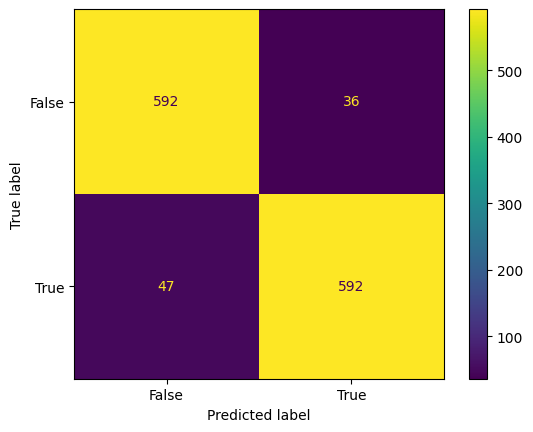

In [69]:
cm = confusion_matrix(y_test, y_pred_pac)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()


*   Berita REAL diprediksi FAKE ada 47 dan berita FAKE diprediksi REAL ada 36



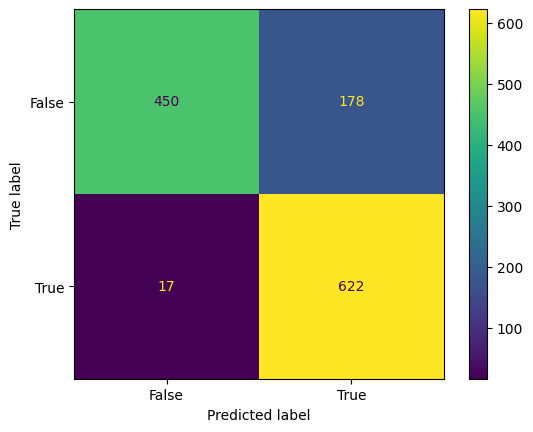

In [70]:
#confusion matrix Multinomial NB
cm = confusion_matrix(y_test, y_pred_mnb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()


*   Berita REAL diprediksi FAKE (False Negatif) = 17
*   Berita FAKE diprediksi REAL (False Positif) = 176



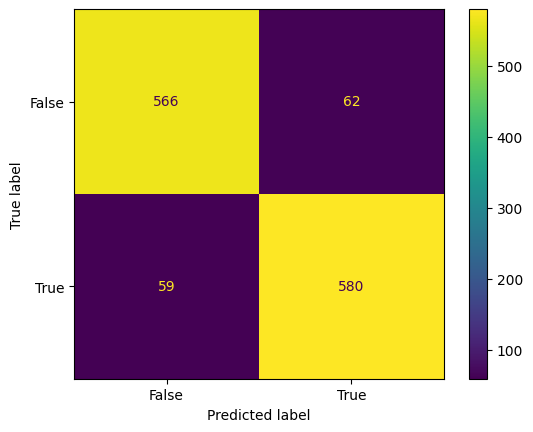

In [71]:
#confusion matrix Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()


*   Berita REAL diprediksi FAKE (False Negatif) = 68
*   Berita FAKE diprediksi REAL (False Positif) = 50

